# Datasets creation

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib.gridspec import GridSpec
from ecgdetectors import Detectors
from scipy.signal import resample
from math import floor
import neurokit2 as nk
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from datetime import  timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy
from scipy import signal

In [2]:
# DECODING FUNCTIONS
def convert_array_to_signed_int(data, offset, length):
    return int.from_bytes(
        bytearray(data[offset: offset + length]), byteorder="little", signed=True,
    )


def convert_to_unsigned_long(data, offset, length):
    return int.from_bytes(
        bytearray(data[offset: offset + length]), byteorder="little", signed=False,
    )


def conv_ecg(data):
    ecg_session_data = []
    ecg_session_time = []
    if len(data)>0:
        tmp = data[0]
    else:
        tmp = 0x00

    if tmp == 0x00:
        timestamp = convert_to_unsigned_long(data, 1, 8)
        step = 3
        samples = data[10:] # Check 10 ?
        offset = 0
        while offset < len(samples):
            ecg = convert_array_to_signed_int(samples, offset, step)
            offset += step
            ecg_session_data.extend([ecg])
            ecg_session_time.extend([timestamp])
    return ecg_session_data

In [3]:
def segment_ECG(ecg_signal, fs = 130, word_len = 100):
    detectors = Detectors(fs)
    r_peaks = detectors.two_average_detector(np.squeeze(ecg_signal))
    ecg_matrix = []
    original_len = []
    for i in range(len(r_peaks)-1):
        l = r_peaks[i+1] - r_peaks[i]
        ecg_segment = np.array((ecg_signal[r_peaks[i]:r_peaks[i+1]]).reshape(1,-1)[0])
        original_len.append(len(ecg_segment))
        ecg_word = resample(ecg_segment, word_len)
        ecg_matrix.append(ecg_word)

    ecg_matrix = np.array(ecg_matrix)
    return ecg_matrix, r_peaks, original_len

def segment_PPG(ppg_signal, fs = 100, word_len = 100):
    original_len = []
    ppg_matrix = []
    peaks, _ = find_peaks(np.squeeze(ppg_signal), prominence = 30)#, height = 40, distance = 40)
    for i in range(len(peaks)-1):
        dist = int((peaks[i]-peaks[i+1])*3/4)
        ppg_segment = np.array((ppg_signal[peaks[i]-dist : peaks[i+1]-dist]).reshape(1,-1)[0])
        original_len.append(len(ppg_segment))
        ppg_word = resample(ppg_segment, word_len)
        ppg_matrix.append(ppg_word)
        
    ppg_matrix = np.array(ppg_matrix)
    return ppg_matrix, peaks, original_len

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.transforms import Bbox

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

In [4]:
# at rest dataset
dire = ['Simo_seduto_202228_9h57.csv',
 'Lilli_s_202229_21h12.csv',
 'Marg_seduta_202229_11h31.csv',
 'Simo_seduto_202228_10h44.csv',
 'Marg_seduta_202229_11h37.csv',
 'Lilli_s_202228_20h29.csv',
 'Marg_seduta_202229_12h1.csv',
 'Simo_seduto_202228_10h4.csv',
 'Lilli_s_202229_20h35.csv',
 'Simo_seduto_202228_10h36.csv',
 'Marg_seduta_202229_11h43.csv',
 'Simo-seduto_202226_17h38.csv',
 'Luci_seduta_202229_12h10.csv',
 'Marg_seduta_202229_11h49.csv',
 'Luci_seduta_202229_12h28.csv',
 'Lilli_seduta_202228_20h13.csv',
 'Simo_seduto_202228_10h28.csv',
 'Luci_seduta_202229_10h11.csv',
 'Lilli_s_202229_21h27.csv',
 'Lilli_s_202229_21h19.csv',
 'Simo_seduto_202228_10h19.csv',
 'Marg_seduta_202229_11h55.csv',
 'Luci_seduta_202229_12h33.csv',
 'Luci_seduta_202229_9h48.csv',
 'Lilli_seduta_202228_20h21.csv',
 'Marg_seduta_202229_11h16.csv',
 'Lilli_seduta_202228_20h6.csv',
 'Lilli_seduta_202228_19h54.csv',
 'Luci_seduta_202229_12h39.csv',
 'Luci_seduta_2022120_11h10.csv',
 'Luci_seduta_202229_12h22.csv',
 'Luci_seduta_202229_12h16.csv',
'Lilli_s_2022214_20h29.csv',
'Lilli_s_2022214_20h35.csv',
'Luci_seduta_2022214_20h33.csv',
'Luci_seduta_2022215_9h39.csv',
'Marg_2022215_10h15.csv',
'Marg_2022215_10h9.csv',
'Simo_2022214_19h39.csv',
'Simo_s_2022214_19h28.csv']

In [29]:
# in motion dataset
dire = ['Luci_cammina_2022120_11h18.csv',
'Luci_cammina_202229_18h14.csv',
'Luci_cammina_202229_18h20.csv',
'Luci_cammina_202229_18h26.csv',
'Luci_cammina_202229_18h32.csv',
'Luci_cammina_202229_18h37.csv',
'Luci_cammina_202229_18h43.csv',
'Luci_cammina_202229_18h49.csv',
'Luci_cammina_202229_18h9.csv',
'Luci_seduta_2022120_11h10.csv',
'Luci_seduta_202229_10h11.csv',
'Luci_seduta_202229_12h10.csv',
'Luci_seduta_202229_12h16.csv',
'Luci_seduta_202229_12h22.csv',
'Luci_seduta_202229_12h28.csv',
'Luci_seduta_202229_12h33.csv',
'Luci_seduta_202229_12h39.csv',
'Luci_seduta_202229_9h48.csv',
'Simo-seduto_202226_17h38.csv',
'Simo_cammina_202228_11h14.csv',
'Simo_cammina_202228_11h22.csv',
'Simo_cammina_202228_11h6.csv',
'Simo_camminata_202226_17h55.csv',
'Simo_camminats_202228_11h29.csv',
'Simo_seduto_202228_10h19.csv',
'Simo_seduto_202228_10h28.csv',
'Simo_seduto_202228_10h36.csv',
'Simo_seduto_202228_10h4.csv',
'Simo_seduto_202228_10h44.csv',
'Simo_seduto_202228_9h40.csv',
'Simo_seduto_202228_9h50.csv',
'Simo_seduto_202228_9h57.csv']

ECG plots for:  Simo_seduto_202228_9h57.csv
PPG plots for:  Simo_seduto_202228_9h57.csv


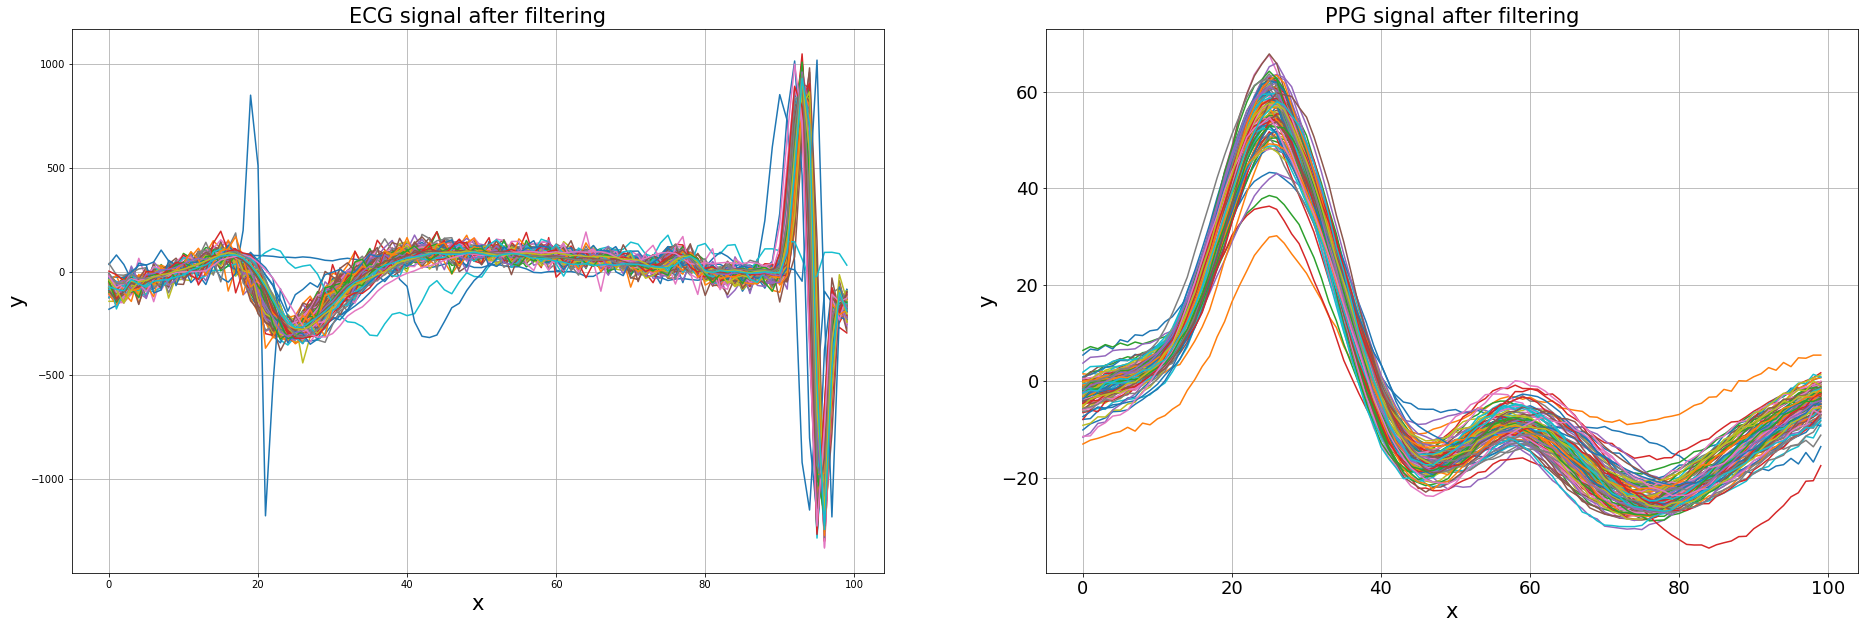

In [20]:
filtering = True
scaler = False
plots = True
fft_plots = False

p = 0
for name in dire:
    
    if (name != ".ipynb_checkpoints") & (name != 'cammina'):
        if name[0] == "S":
            label = 0
        elif name[0:2] == 'Lu':
            label = 1
        elif name[0:2] == 'Li':
            label = 2
        elif name[0] == 'M':
            label = 3
        # if name[0] == "S":
        #     label = 0 
        #     if name[5] =="c":
        #         label += 2
        # else:
        #     label = 1
        #     if name[5] == "c":
        #         label += 2
        DATA_FILE_PATH           = "../data/"+name
        data_df                  = pd.read_csv(DATA_FILE_PATH, sep='\t')
        data_df["ECGTimestamps"] = data_df["ECGTimestamps"].astype('datetime64[ms]')
        data_df["OXYTimestamps"] = data_df["OXYTimestamps"].astype('datetime64[ms]')
        beginOXY                 = data_df["OXYTimestamps"].iloc[0]
        dataECG                  = data_df[["ECGString","ECGTimestamps"]].copy().dropna() 
        dataOXY                  = data_df[["PPGvalue","SpO2value","OXYTimestamps"]].copy().dropna()
        dataECG = dataECG.rename(columns={"ECGTimestamps": "Time"})
        dataOXY = dataOXY.rename(columns={"OXYTimestamps": "Time"})
        
        ecg_signal = []
        for sample in dataECG["ECGString"]:      
            array_data = bytearray()
            vec = np.arange(0, len(sample), 2)

            for index in vec:
                tmp = sample[index:index + 2]
                tmp2 = int(tmp, 16)
                array_data.append(int(tmp2))

            ecg_track = conv_ecg(array_data)
            ecg_signal.extend(ecg_track)
            ecg_timestamps = dataECG["Time"]
        ecg_time = []

        for i in range(len(ecg_timestamps)):
            for j in range(len(ecg_track)):
                if i < len(ecg_timestamps)-1:
                    sample = ecg_timestamps[i] + (ecg_timestamps[i+1] - ecg_timestamps[i])/len(ecg_track)*j
                    ecg_time.append(sample)
                else: # Last segment
                    sample = ecg_timestamps[i] + (ecg_timestamps[i] - ecg_timestamps[i-1])/len(ecg_track)*j
                    ecg_time.append(sample)

        data_ECG = pd.DataFrame({'Signal': ecg_signal, 'Time': ecg_time})
        data_ECG["Time"] = data_ECG["Time"].round("S")
        dataOXY["Time"]  = dataOXY["Time"].round("S")
        beginOXY = dataOXY["Time"].iloc[0]
        beginECG = data_ECG["Time"].iloc[0]
        
        # clean out first seconds (noisy signal)
        beginOXY = beginOXY +  timedelta(seconds=10)
        beginECG = beginECG +  timedelta(seconds=10)
        dataOXY  = dataOXY[dataOXY["Time"]>beginOXY]
        data_ECG = data_ECG[data_ECG["Time"]>beginECG]
        N = int(floor((dataOXY["Time"].iloc[len(dataOXY["Time"])-1]- beginOXY)/timedelta(seconds=2)))
        
        # SAVE DATA
        # Faccio fare un primo giro per vedere quale ECG e OXY è più corto
        minOXY = 19999
        minECG = 19999
        for i in range(1,N):
            time_in     = beginOXY + timedelta(seconds=2)*i
            time_end    = beginOXY + timedelta(seconds=2)*(i+1)
            oxyppgs     = dataOXY[(dataOXY["Time"] > time_in ) & (dataOXY["Time"] < time_end)]["PPGvalue"]
            ECGs        = data_ECG[(data_ECG["Time"] > time_in ) & (data_ECG["Time"] < time_end)]["Signal"]
            if len(ECGs) < minECG:
                minECG = len(ECGs)
            if len(oxyppgs) < minOXY:
                minOXY = len(oxyppgs)

        for i in range(1,N):
            time_in     = beginOXY + timedelta(seconds=2)*i
            time_end    = beginOXY + timedelta(seconds=2)*(i+1)
            oxyppgs     = dataOXY[(dataOXY["Time"] > time_in ) & (dataOXY["Time"] < time_end)]["PPGvalue"]
            ECGs        = data_ECG[(data_ECG["Time"] > time_in ) & (data_ECG["Time"] < time_end)]["Signal"]

            if i==1 and name == dire[0]:
                dataset = pd.DataFrame({"ECG_Signal":[np.array(ECGs[:minECG])],"PPG_Signal":[np.array(oxyppgs[:minOXY])],"Label":label,"time_begin":time_in,"time_end":time_end})
            else:
                dataset = dataset.append(pd.DataFrame({"ECG_Signal":[np.array(ECGs[:minECG])],"PPG_Signal":[np.array(oxyppgs[:minOXY])],"Label":label,"time_begin":time_in,"time_end":time_end}))
        
        
        # FILTERING 
        if filtering:
            sos = signal.butter(8, 0.5, 'highpass', fs=130, output='sos')
            filtered = signal.sosfilt(sos, data_ECG['Signal'])
            data_ECG_old = data_ECG['Signal']
            data_ECG['Signal'] = filtered
            
            sos = signal.butter(4, 0.5, 'highpass', fs=100, output='sos')
            filtered = signal.sosfilt(sos, dataOXY['PPGvalue'])
            dataOXY_old = dataOXY['PPGvalue']
            dataOXY['PPGvalue'] = filtered
            
        
        ecg_signal = np.array(data_ECG['Signal'])
        ecg_signal = np.array(ecg_signal).reshape(-1,1)
        ecg_mat, ecg_peaks, ecg_original_len = segment_ECG(ecg_signal)
        ppg_signal = np.array(dataOXY["PPGvalue"]).reshape(-1,1)
        ppg_signal = np.array(ppg_signal).reshape(-1,1)
        ppg_mat, ppg_peaks, ppg_original_len = segment_PPG(ppg_signal)

        if scaler:
            scaler = StandardScaler()
            ecg_mat_norm = scaler.fit_transform(ecg_mat.T)
            ppg_mat_norm = scaler.fit_transform(ppg_mat.T)
        else:
            ecg_mat_norm = ecg_mat.T
            ppg_mat_norm = ppg_mat.T
        
        for i in range(ecg_mat_norm.shape[1]):
            if i==0 and name == dire[0]:
                    dataset_ECG = pd.DataFrame({"ECG_Signal": [ecg_mat_norm[:,i]],"Label":label})
            else:
                    dataset_ECG = dataset_ECG.append(pd.DataFrame({"ECG_Signal": [ecg_mat_norm[:,i]],"Label":label}))
        
        for i in range(ppg_mat_norm.shape[1]):
            if i==0 and name == dire[0]:
                    dataset_OXY = pd.DataFrame({"PPG_Signal": [ppg_mat_norm[:,i]],"Label":label})
            else:
                    dataset_OXY = dataset_OXY.append(pd.DataFrame({"PPG_Signal": [ppg_mat_norm[:,i]],"Label":label}))
        
        if plots:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,10))
            plt.xticks(fontsize=18) 
            plt.yticks(fontsize=18)
            
            print('ECG plots for: ', name)
            for i in range(ecg_mat.shape[1]):
                ax1.plot(ecg_mat_norm[:,i])
                ax1.set_title("ECG signal after filtering", fontsize=21)
                ax1.set_xlabel("x", fontsize=21)
                ax1.set_ylabel("y", fontsize=21)
                ax1.grid(True)
            
            print('PPG plots for: ', name)
            for i in range(ppg_mat.shape[1]):
                ax2.plot(ppg_mat_norm[:,i])
                ax2.set_title("PPG signal after filtering", fontsize=21)
                ax2.set_xlabel("x", fontsize=21)
                ax2.set_ylabel("y", fontsize=21)
                ax2.grid(True)
    
            plt.show()
            
        if fft_plots:
            fig, axs = plt.subplots(2, 2, figsize=(32,20))
            plt.xticks(fontsize=18) 
            plt.yticks(fontsize=18)
            
            N = len(data_ECG_old)
            yf = scipy.fft.fft(data_ECG_old.astype(int))
            xf = scipy.fft.fftfreq(N, 1 / 130)
            axs[0,0].plot(xf, np.abs(yf), 'darkblue', linewidth=1)
            axs[0,0].set_title("FFT of ECG signal before filtering", fontsize=21)
            axs[0,0].set_xlabel("Frequency (Hz)", fontsize=21)
            axs[0,0].set_ylabel("Amplitude", fontsize=21)
            axs[0,0].grid()
            extent = full_extent(axs[0,0]).transformed(fig.dpi_scale_trans.inverted())
            fig.savefig('img/ecg_fft_before_filtering.png', bbox_inches=extent)
            
            N = len(data_ECG)
            yf = scipy.fft.fft(data_ECG['Signal'].astype(int))
            xf = scipy.fft.fftfreq(N, 1 / 130)
            axs[0,1].plot(xf, np.abs(yf), 'darkblue', linewidth=1)
            axs[0,1].set_title("FFT of ECG signal after filtering", fontsize=21)
            axs[0,1].set_xlabel("Frequency (Hz)", fontsize=21)
            axs[0,1].set_ylabel("Amplitude", fontsize=21)
            axs[0,1].grid()
            extent = full_extent(axs[0,1]).transformed(fig.dpi_scale_trans.inverted())
            fig.savefig('img/ecg_fft_after_filtering.png', bbox_inches=extent)
            
            N = len(dataOXY_old)
            yf = scipy.fft.fft(dataOXY_old.astype(int))
            xf = scipy.fft.fftfreq(N, 1 / 100)
            axs[1,0].plot(xf, np.abs(yf), 'darkred', linewidth=1)
            axs[1,0].set_title("FFT of PPG signal before filtering", fontsize=21)
            axs[1,0].set_xlabel("Frequency (Hz)", fontsize=21)
            axs[1,0].set_ylabel("Amplitude", fontsize=21)
            axs[1,0].grid()
            extent = full_extent(axs[1,0]).transformed(fig.dpi_scale_trans.inverted())
            fig.savefig('img/ppg_fft_before_filtering.png', bbox_inches=extent)
            
            N = len(dataOXY)
            yf = scipy.fft.fft(dataOXY['PPGvalue'].astype(int))
            xf = scipy.fft.fftfreq(N, 1 / 100)
            axs[1,1].plot(xf, np.abs(yf), 'darkred', linewidth=1)
            axs[1,1].set_title("FFT of PPG signal after filtering", fontsize=21)
            axs[1,1].set_xlabel("Frequency (Hz)", fontsize=21)
            axs[1,1].set_ylabel("Amplitude", fontsize=21)
            axs[1,1].grid()
            extent = full_extent(axs[1,1]).transformed(fig.dpi_scale_trans.inverted())
            fig.savefig('img/ppg_fft_after_filtering.png', bbox_inches=extent)
            
            fig.savefig('img/fft.pdf')
            plt.show()

In [19]:
ecg_mat_bef = ecg_mat
ecg_mat_norm_bef = ecg_mat_norm
ppg_mat_bef = ppg_mat
ppg_mat_norm_bef = ppg_mat_norm

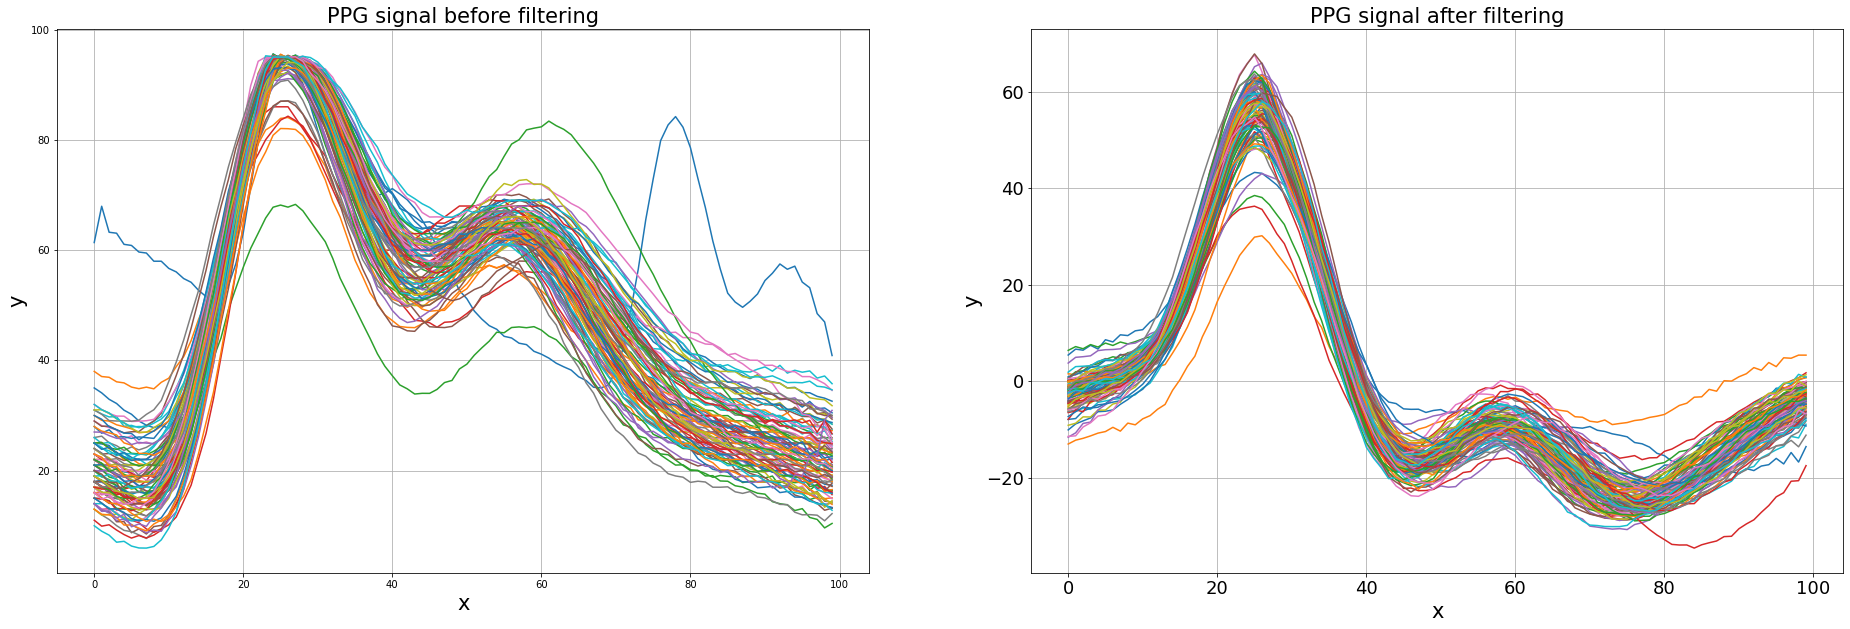

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,10))
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)

#print('ECG plots for: ', name)
for i in range(ppg_mat_bef.shape[1]):
    ax1.plot(ppg_mat_norm_bef[:,i])
    ax1.set_title("PPG signal before filtering", fontsize=21)
    ax1.set_xlabel("x", fontsize=21)
    ax1.set_ylabel("y", fontsize=21)
    ax1.grid(True)

#print('PPG plots for: ', name)
for i in range(ppg_mat.shape[1]):
    ax2.plot(ppg_mat_norm[:,i])
    ax2.set_title("PPG signal after filtering", fontsize=21)
    ax2.set_xlabel("x", fontsize=21)
    ax2.set_ylabel("y", fontsize=21)
    ax2.grid(True)

fig.savefig('img/samples_ppg.pdf')
plt.show()

In [8]:
dataset.to_csv("../DATA_CSV/all.csv")
dataset_OXY.to_csv("../DATA_CSV/PPG.csv")
dataset_ECG.to_csv("../DATA_CSV/ECG.csv")